# Neural Network

## Dataset Stocks

### Import libraries for NN

In [1]:
from keras import models, layers, optimizers, regularizers
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


### Bring the data in for training

In [2]:
x_train = pd.read_csv("train.csv")
x_train = x_train.drop(['Date'], axis=1)
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(['Date'], axis=1)
x_test.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,2683.73,2695.81,2695.89,2682.36,1846463232
1,2697.85,2713.06,2714.37,2697.77,2090595328
2,2719.31,2723.99,2729.29,2719.07,2100767744
3,2731.33,2743.15,2743.45,2727.92,1918869120
4,2742.67,2747.71,2748.51,2737.60,1894823936


### Getting the result of Stocks Up and Down

We have to obtain the stocks up and down status by comparing close prices within two following days.
Make up a list y(up and down) for both train and test data. The return data will be our y_train and y_test, we do not need to merge x and y together anymore. They are separated now.

In [3]:
# iterate over rows with iterrows()
close_prices = x_train['Close Price']
up_down_train = [0]
for i in range(1, len(close_prices)):
    if close_prices[i] - close_prices[i-1] > 0:
        up_down_train.append(1)
    else:
        up_down_train.append(0)
up_down_train

y_train = pd.Series(up_down_train)

close_prices = x_test['Close Price']
up_down_test = [0]
for i in range(1, len(close_prices)):
    if close_prices[i] - close_prices[i-1] > 0:
        up_down_test.append(1)
    else:
        up_down_test.append(0)
up_down_test

y_test = pd.Series(up_down_test)

### Normalize the data

In [4]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)
x_test

array([[1.45344351e-06, 1.45998575e-06, 1.46002907e-06, 1.45270155e-06,
        1.00000000e+00],
       [1.29046974e-06, 1.29774518e-06, 1.29837179e-06, 1.29043147e-06,
        1.00000000e+00],
       [1.29443629e-06, 1.29666404e-06, 1.29918693e-06, 1.29432204e-06,
        1.00000000e+00],
       ...,
       [1.02347978e-06, 1.04289342e-06, 1.04300656e-06, 1.00480782e-06,
        1.00000000e+00],
       [1.20091219e-06, 1.19464995e-06, 1.21124512e-06, 1.18847423e-06,
        1.00000000e+00],
       [1.30651228e-06, 1.31064784e-06, 1.31189740e-06, 1.29808432e-06,
        1.00000000e+00]])

### Setting the parameters used by the neuron network

In [5]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

### Create NN model

In [6]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Process of the training and result of training

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2264/2264 [==============================] - 1s 309us/step - loss: 0.6926 - acc: 0.5327
Epoch 2/10
2264/2264 [==============================] - 0s 60us/step - loss: 0.6902 - acc: 0.5318
Epoch 3/10
2264/2264 [==============================] - 0s 74us/step - loss: 0.6903 - acc: 0.5459
Epoch 4/10
2264/2264 [==============================] - 0s 88us/step - loss: 0.6911 - acc: 0.5380
Epoch 5/10
2264/2264 [==============================] - 0s 71us/step - loss: 0.6915 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 73us/step - loss: 0.6932 - acc: 0.5309
Epoch 7/10
2264/2264 [==============================] - 0s 80us/step - loss: 0.6914 - acc: 0.5353
Epoch 8/10
2264/2264 [==============================] - 0s 59us/step - loss: 0.6898 - acc: 0.5459
Epoch 9/10
2264/2264 [==============================] - 0s 67us/step - loss: 0.6915 - acc: 0.5433
Epoch 10/10
252/252 [==============================] - 0s 62us/step
T

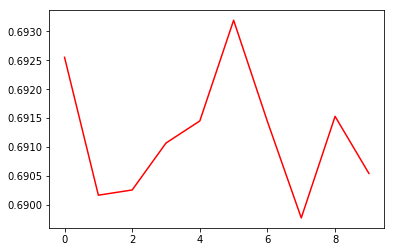

In [7]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Redo the training by dropping volume

From logistic regression, we can see dropping the column "volume" makes a huge change on accuracy increase. So here, I am taking the data from csv again for the next training.

It is because neuron networking taking the training data into another dimension (by preprocessing.normalize). So it would be much easy that just bring back the data straight from csv and do it again.

In [8]:
x_train = pd.read_csv("train.csv")
x_train = x_train.drop(['Date'], axis=1)
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(['Date'], axis=1)

#### Drop volume

In [9]:
x_train = x_train.drop(['Volume'], axis=1)
x_test = x_test.drop(['Volume'], axis=1)

#### Normalize the training and testing data

In [10]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

### Tweak the parameters

Here, I add more hidden unit to 15, and made epochs 20

In [11]:
hidden_units = 15    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32

### Rebuild the NN model

It is because of dropping a column, the dimension of the training data is different now, we have to rebuild the model every single time to satisfy the model.

In [12]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=4,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

### Make it learn

Epoch 1/20
2264/2264 [==============================] - 0s 178us/step - loss: 0.6928 - acc: 0.5318
Epoch 2/20
2264/2264 [==============================] - 0s 68us/step - loss: 0.6899 - acc: 0.5345
Epoch 3/20
2264/2264 [==============================] - 0s 63us/step - loss: 0.6892 - acc: 0.5442
Epoch 4/20
2264/2264 [==============================] - 0s 79us/step - loss: 0.6933 - acc: 0.5292
Epoch 5/20
2264/2264 [==============================] - 0s 65us/step - loss: 0.6925 - acc: 0.5353
Epoch 6/20
2264/2264 [==============================] - 0s 74us/step - loss: 0.6915 - acc: 0.5371
Epoch 7/20
2264/2264 [==============================] - 0s 128us/step - loss: 0.6912 - acc: 0.5336
Epoch 8/20
2264/2264 [==============================] - 0s 128us/step - loss: 0.6928 - acc: 0.5309
Epoch 9/20
2264/2264 [==============================] - 0s 106us/step - loss: 0.6905 - acc: 0.5459
Epoch 10/20
2264/2264 [==============================] - 0s 86us/step - loss: 0.6952 - acc: 0.5133
Epoch 11/20
226

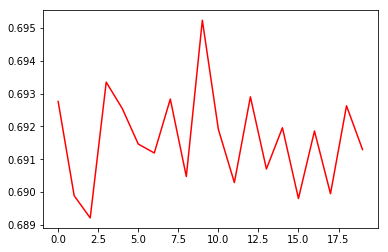

In [13]:
# train the parameters
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Getting the average accuracy

### Neuron network training result are not persistent

The accuracy that obtain from the model will not be the same every single time. It is a good practice to redo the training like 20 times, then study it's charactoristics.

Function below evaluate the accuracy in 20 times, present the pregress in pregress bar, and return the accuracy list.

In [14]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

### The process

In [15]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:39<00:00,  1.67s/it]

Avgerage Training Accuracy: 0.5413427562943195
Avgerage Testing Accuracy: 0.5178571434484589


### Violin plot

As we can see, even I tweak some parameters, the result for this dataset is limited, the accuracy is persistant, 0.517xxxxxxx 

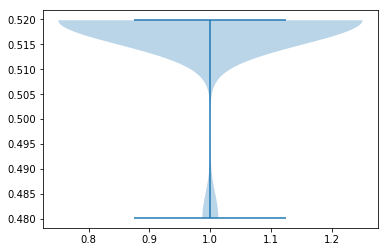

In [19]:
plt.violinplot(test_accs)
plt.show()

# Compare result with Titanic

In [21]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df = df.drop('PassengerId', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)

In [23]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(avgage, inplace = True)

In [26]:
df = df.drop('Cabin', axis = 1)
df = df.drop('Embarked', axis = 1)
df = df.drop('Sex', axis = 1)

In [34]:
df = df.drop('Sex', axis = 1)

In [35]:
import random
def split(data):
    # control randomization for reproducibility
    np.random.seed(42)
    random.seed(42)
    train, test = model_selection.train_test_split(data)
    x_train = train.loc[:, train.columns != 'Survived']
    y_train = train['Survived']
    x_test = test.loc[:, test.columns != 'Survived']
    y_test = test['Survived']
    return x_train, y_train, x_test, y_test

In [36]:
x_train, y_train, x_test, y_test = split(df)

In [37]:
hidden_units = 15    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32

In [38]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/20
668/668 [==============================] - 0s 647us/step - loss: 1.8353 - acc: 0.5778
Epoch 2/20
668/668 [==============================] - 0s 72us/step - loss: 0.6912 - acc: 0.6796
Epoch 3/20
668/668 [==============================] - 0s 73us/step - loss: 0.6307 - acc: 0.6692
Epoch 4/20
668/668 [==============================] - 0s 56us/step - loss: 0.6217 - acc: 0.6722
Epoch 5/20
668/668 [==============================] - 0s 70us/step - loss: 0.6140 - acc: 0.6841
Epoch 6/20
668/668 [==============================] - 0s 60us/step - loss: 0.6238 - acc: 0.6751
Epoch 7/20
668/668 [==============================] - 0s 67us/step - loss: 0.6063 - acc: 0.6841
Epoch 8/20
668/668 [==============================] - 0s 59us/step - loss: 0.6081 - acc: 0.6826
Epoch 9/20
668/668 [==============================] - 0s 97us/step - loss: 0.6029 - acc: 0.6781
Epoch 10/20
668/668 [==============================] - 0s 56us/step - loss: 0.6018 - acc: 0.6871
Epoch 11/20
668/668 [=================

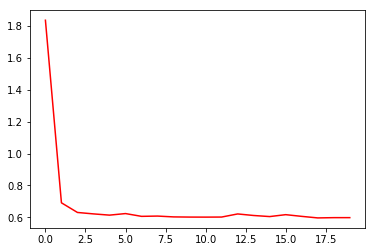

In [39]:
# train the parameters
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

# Try to do more with my dataset